In [1]:
#Pimeiro vamos importar as bibliotecas Primárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Lendo o arquivo csv
dataframe = pd.read_csv("seattle-weather.csv")

In [3]:
#Apresentando os 10 primeiras amostras(Linhas)
dataframe.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [8]:
#Selecionando as features que serão analisadas por agora - Clusterização Kmeans
features_to_cluster = ["precipitation","wind"]

In [12]:
#Retirando as features com os conjuntos que não são de interesse
clean_dataframe = dataframe.dropna(subset=features_to_cluster)

In [14]:
#Copiamos o dataframe apenas com as features desejadas
df = dataframe[features_to_cluster].copy()

In [15]:
#Acompanhando comportamento da tabela
df.head()

,precipitation,wind
0,0.0,4.7
1,10.9,4.5
2,0.8,2.3
3,20.3,4.7
4,1.3,6.1


In [16]:
#Normalização "Lazy" usando Scikit - MinMaxSacler
from sklearn.preprocessing import MinMaxScaler #Importando a Biblioteca

In [20]:
#Ajustando as escalas
scaler = MinMaxScaler() # Instancio o objeto
#Para precipitação
scaler.fit(df[["precipitation"]]) #Ajuste da feature Precipitation diretamente com o método fit
df["precipitation"] = scaler.transform(df[["precipitation"]]) #A feature da tabela recebe os dados normalizados
#Para o Vento
scaler.fit(df[["wind"]])
df["wind"] = scaler.transform(df[["wind"]])



In [21]:
#Verificando os dados normalizados na tabela
df.head()

,precipitation,wind,precipitationn
0,0.000000,0.472527,0.000000
1,0.194991,0.450549,0.194991
2,0.014311,0.208791,0.014311
3,0.363148,0.472527,0.363148
4,0.023256,0.626374,0.023256


In [22]:
#Corrigindo erro na tabela
df.drop(["precipitationn"],axis="columns",inplace=True)
df.head()

,precipitation,wind
0,0.000000,0.472527
1,0.194991,0.450549
2,0.014311,0.208791
3,0.363148,0.472527
4,0.023256,0.626374


In [23]:
#Como iremos usar o kmeans para clusterizar nossos dados vamos importar a biblioteca
from sklearn.cluster import KMeans

In [24]:
#Temos 5 possiveis labels no projeto então a priori vamos separar em 5 grupos/clusters
km = KMeans(n_clusters=5)

In [25]:
#Agora iremos alocar a label de previsões do kmeans
label_predicted = km.fit_predict(df)

C:\Users\Veecstart\Desktop\weather-project\ambiente\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
#Vamos obsercar agora a label acima
label_predicted

array([4, 0, 1, ..., 1, 4, 4])

In [27]:
#Atribuindo a label ana tabela
df["cluster"] = label_predicted
#presentando a tabela
df.head()

,precipitation,wind,cluster
0,0.000000,0.472527,4
1,0.194991,0.450549,0
2,0.014311,0.208791,1
3,0.363148,0.472527,0
4,0.023256,0.626374,3


In [28]:
#aGRUPANDO EM SUGGRUPOS DENTRO DA TABELA FUTURA
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

In [29]:
#iDNETIFICANDO AS CENTROIDES
km.cluster_centers_

array([[0.25356399, 0.34768324],
       [0.01365355, 0.1887626 ],
       [0.5348076 , 0.53682488],
       [0.07431168, 0.60054314],
       [0.0157013 , 0.36204336]])

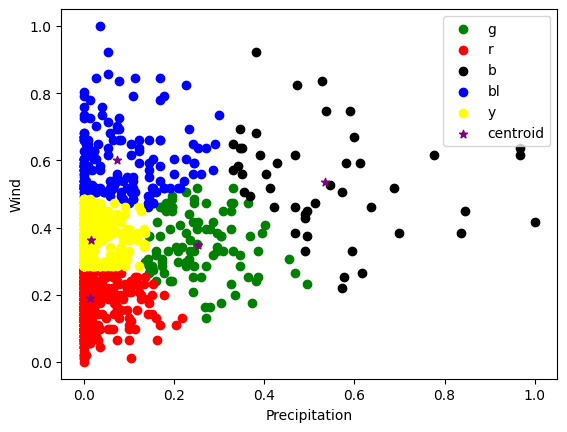

In [30]:
#Plotando o gráfico de dispensão (2Variáveis)
#Agora só ver detalhes de apresentação
plt.scatter(df1["precipitation"],df1["wind"],color='green',label = "g")
plt.scatter(df2["precipitation"],df2["wind"],color='red',label = "r")
plt.scatter(df3["precipitation"],df3["wind"],color='black',label = "b")
plt.scatter(df4["precipitation"],df4["wind"],color='blue',label = "bl")
plt.scatter(df5["precipitation"],df5["wind"],color='yellow',label = "y")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel("Precipitation")
plt.ylabel("Wind")
plt.legend()

In [31]:
#Fazendo o elbow test só para verificar se a quantidade de grupos para essas features está ok
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\Veecstart\Desktop\weather-project\ambiente\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Veecstart\Desktop\weather-project\ambiente\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Veecstart\Desktop\weather-project\ambiente\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Veecstart\Desktop\weather-project\ambiente\Lib\site-packages\sklearn\cluster\_kmeans.

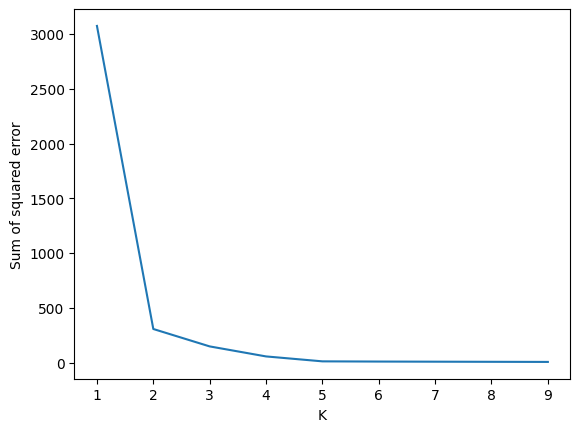

In [32]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)